# Homework Assignment 2

## Section 1: Admissions Dataset

In [54]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [4]:
admissions.shape

(400, 4)

In [6]:
admissions.prestige.value_counts(normalize=True, ascending = False) 

2.0    0.375940
3.0    0.303258
4.0    0.167920
1.0    0.152882
Name: prestige, dtype: float64

In [8]:
admissions.gpa.value_counts(normalize=True, ascending = False) 

4.00    0.070352
3.31    0.020101
3.15    0.017588
3.45    0.017588
3.35    0.017588
3.40    0.017588
2.98    0.015075
3.63    0.015075
3.77    0.012563
3.94    0.012563
3.95    0.012563
3.46    0.012563
3.17    0.012563
3.64    0.012563
3.33    0.012563
3.58    0.012563
3.19    0.012563
3.51    0.012563
3.59    0.012563
2.93    0.012563
3.43    0.012563
3.13    0.012563
3.38    0.012563
3.22    0.012563
3.34    0.012563
3.02    0.010050
3.07    0.010050
3.67    0.010050
3.30    0.010050
3.08    0.010050
          ...   
2.76    0.002513
2.95    0.002513
3.85    0.002513
3.41    0.002513
3.93    0.002513
2.87    0.002513
3.11    0.002513
3.97    0.002513
3.83    0.002513
3.09    0.002513
2.48    0.002513
2.69    0.002513
2.88    0.002513
2.65    0.002513
3.91    0.002513
2.56    0.002513
3.42    0.002513
3.87    0.002513
2.52    0.002513
2.63    0.002513
3.82    0.002513
3.03    0.002513
2.84    0.002513
2.83    0.002513
3.98    0.002513
3.66    0.002513
2.26    0.002513
3.18    0.0025

In [9]:
# Target Variable is "admit"
# gre, gpa and prestige are the features
# gre and gpa are continuous. Prestige is categorical

In [5]:
# Computing NULL RATE

admissions.admit.value_counts(normalize=True, ascending = False) 

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [ ]:
#Null Rate is 68%

In [15]:
#Creating the dummy variable

admit_dums = pd.get_dummies(admissions.prestige, prefix = "prestige", drop_first= True)

In [16]:
admissions.drop("prestige",axis =1,inplace = True)

In [17]:
#2. Concatenate the admissions and prestige dataframes

adm_df = pd.concat([admissions,admit_dums],axis = 1)
#3. View new concatenated dataframe
adm_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [ ]:
#Goal is to use a student's gpa, gre and prestige to predict whether the he/she will get an admit or not

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

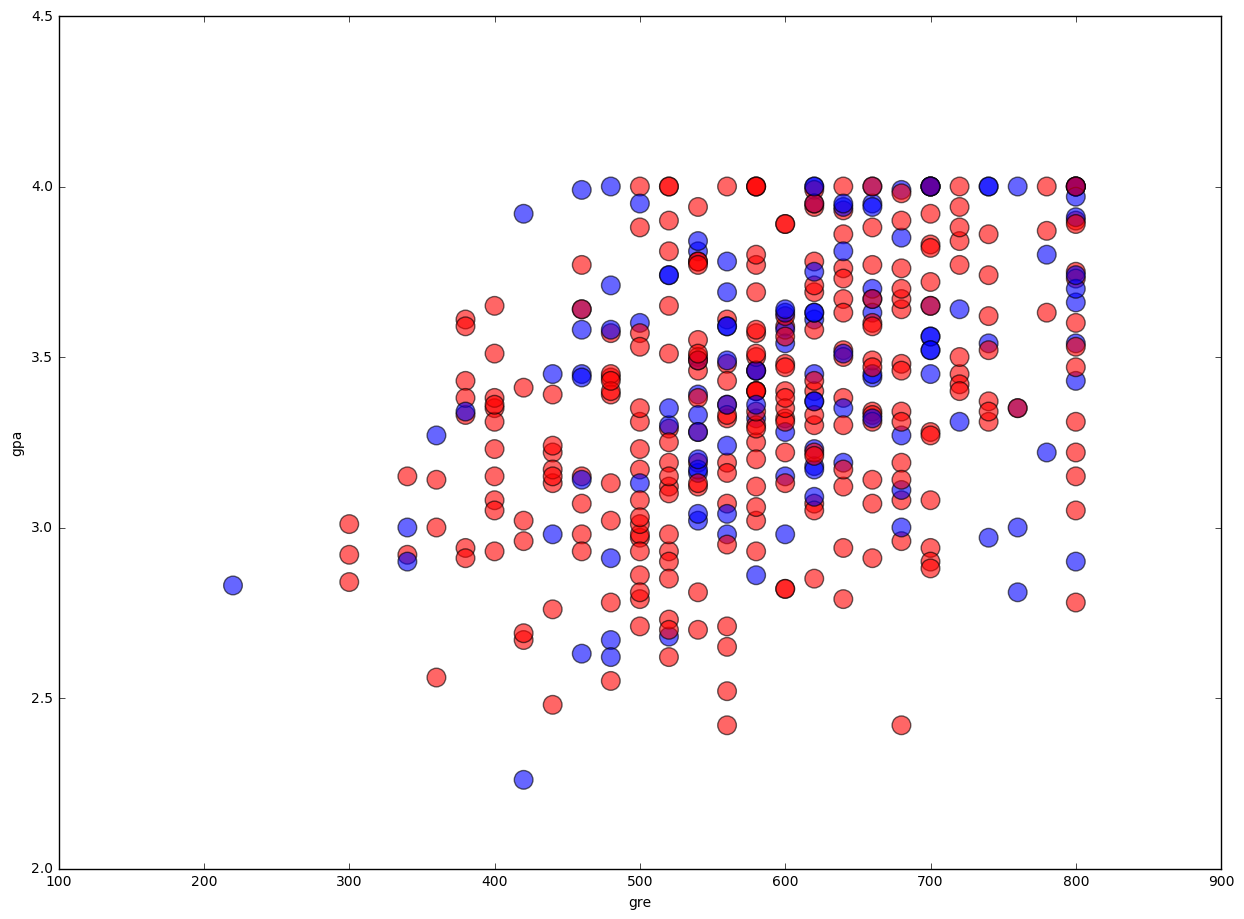

In [18]:
#df = pd.DataFrame(data[0], columns=["feature_one", "feature_two"])
#df["target"] = data[1]
#assign red to class 0 and blue to class 1. For plotting purposes.
colors = pd.Series(adm_df["admit"]).map({0:"red", 1:"blue"})
plt.figure(figsize=(15,11))
plt.scatter(adm_df.gre, adm_df.gpa, c=colors, s=180, alpha = .6)
plt.xlabel("gre",)
plt.ylabel("gpa");

In [ ]:
# We learn the following from the graph
# There is no clear association between gre, gpa values and admit. More information is needed to classify correctly
# Graph shows that smaller % of students get admit

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [3]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;

In [493]:
adm_df.dropna(inplace=True)

In [494]:
#Create X and y variables
X = adm_df.drop("admit", axis=1)
y = adm_df.admit

In [495]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 63.00 percent of the testing data


In [496]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X,y, cv=5, scoring="accuracy").mean()

print (("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100))

The cross validated accuracy score is 70.28 percent


In [127]:
lr.score(X_train,y_train)

0.71380471380471378

In [128]:
lr.score(X_test,y_test)

0.63

In [88]:
X_train.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
16,780.0,3.87,0.0,0.0,1.0
66,740.0,3.62,0.0,0.0,1.0
382,540.0,3.51,1.0,0.0,0.0
7,400.0,3.08,1.0,0.0,0.0
19,540.0,3.81,0.0,0.0,0.0


In [130]:
test_probs = lr.predict_proba(X_train)[:,1]
test_probs

array([ 0.26644114,  0.24417049,  0.35336842,  0.27758115,  0.44369945,
        0.38793488,  0.52724771,  0.37263014,  0.20961792,  0.16743699,
        0.58535805,  0.4661756 ,  0.27907843,  0.38273112,  0.49196442,
        0.5614703 ,  0.22703979,  0.33761676,  0.17679126,  0.3232156 ,
        0.13118928,  0.19675199,  0.46018272,  0.46645758,  0.43844144,
        0.27941298,  0.27218971,  0.17165185,  0.26037679,  0.1725772 ,
        0.23750356,  0.23843035,  0.38859375,  0.13171071,  0.50242047,
        0.1508915 ,  0.22660029,  0.41661742,  0.34214382,  0.44659011,
        0.46775431,  0.42964595,  0.1734028 ,  0.3816569 ,  0.36550979,
        0.17794062,  0.13771684,  0.53422794,  0.25094442,  0.42752916,
        0.12087657,  0.20553448,  0.57806963,  0.27818029,  0.21603902,
        0.20917624,  0.37935237,  0.47781735,  0.43328051,  0.18914359,
        0.35814018,  0.43427737,  0.19531241,  0.42885044,  0.18352318,
        0.32122075,  0.19034494,  0.16365659,  0.49916459,  0.57

In [ ]:
#Lower accuracy score on test, but higher on training dataset suggests overfitting

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

In [4]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

In [32]:
#********************************** KNN MODEL----------------------

In [51]:
#Intialize parameter grid

#Range of neighbors to test
neighbors_range = list(range(1, 41, 2))

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

param_grid_knn

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39]}

In [52]:
#Intialize Grid

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_knn.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [53]:
grid_knn.grid_scores_

[mean: 0.63476, std: 0.05644, params: {'n_neighbors': 1},
 mean: 0.64484, std: 0.06267, params: {'n_neighbors': 3},
 mean: 0.64987, std: 0.03396, params: {'n_neighbors': 5},
 mean: 0.66499, std: 0.03594, params: {'n_neighbors': 7},
 mean: 0.67254, std: 0.05082, params: {'n_neighbors': 9},
 mean: 0.65743, std: 0.04826, params: {'n_neighbors': 11},
 mean: 0.66751, std: 0.04540, params: {'n_neighbors': 13},
 mean: 0.67254, std: 0.06035, params: {'n_neighbors': 15},
 mean: 0.67003, std: 0.04187, params: {'n_neighbors': 17},
 mean: 0.67506, std: 0.03113, params: {'n_neighbors': 19},
 mean: 0.68010, std: 0.03005, params: {'n_neighbors': 21},
 mean: 0.67758, std: 0.03321, params: {'n_neighbors': 23},
 mean: 0.67758, std: 0.02282, params: {'n_neighbors': 25},
 mean: 0.68262, std: 0.02748, params: {'n_neighbors': 27},
 mean: 0.68262, std: 0.02802, params: {'n_neighbors': 29},
 mean: 0.68262, std: 0.02802, params: {'n_neighbors': 31},
 mean: 0.67506, std: 0.01969, params: {'n_neighbors': 33},
 m

In [54]:
grid_knn.best_score_

0.68261964735516378

In [55]:
grid_knn.best_params_

{'n_neighbors': 27}

In [57]:
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "roc_auc")

#Fit grid on data

grid_knn.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [58]:
grid_knn.grid_scores_

[mean: 0.57518, std: 0.06762, params: {'n_neighbors': 1},
 mean: 0.59915, std: 0.06625, params: {'n_neighbors': 3},
 mean: 0.58950, std: 0.05714, params: {'n_neighbors': 5},
 mean: 0.60310, std: 0.02473, params: {'n_neighbors': 7},
 mean: 0.61438, std: 0.06177, params: {'n_neighbors': 9},
 mean: 0.61869, std: 0.04519, params: {'n_neighbors': 11},
 mean: 0.63084, std: 0.04911, params: {'n_neighbors': 13},
 mean: 0.64254, std: 0.05209, params: {'n_neighbors': 15},
 mean: 0.63735, std: 0.06215, params: {'n_neighbors': 17},
 mean: 0.62182, std: 0.05366, params: {'n_neighbors': 19},
 mean: 0.62633, std: 0.05923, params: {'n_neighbors': 21},
 mean: 0.62863, std: 0.06332, params: {'n_neighbors': 23},
 mean: 0.63648, std: 0.06237, params: {'n_neighbors': 25},
 mean: 0.63456, std: 0.06769, params: {'n_neighbors': 27},
 mean: 0.62366, std: 0.06421, params: {'n_neighbors': 29},
 mean: 0.61841, std: 0.06435, params: {'n_neighbors': 31},
 mean: 0.62491, std: 0.06681, params: {'n_neighbors': 33},
 m

In [59]:
grid_knn.best_score_

0.64254065553813666

In [60]:
grid_knn.best_params_

{'n_neighbors': 15}

In [ ]:
#***************************** Decision Tree -----

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [45]:

#Range of neighbors to test
depths_range = list(range(2, 20))

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [48]:
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [49]:
grid_dt.best_score_

0.66498740554156166

In [50]:
grid_dt.best_params_

{'max_depth': 2}

In [61]:
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "roc_auc")

#Fit grid on data

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [62]:
grid_dt.best_score_

0.59964802712913545

In [63]:
grid_dt.best_params_

{'max_depth': 2}

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

In [ ]:
# I would reduce False negatives, as that would mean rejecting students who rightfully deserved an admit. As opposed to 
# "False positive", where students who did not deserve the admit were given one

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [482]:
test_table = pd.DataFrame({'gre':[560,750,660,500],
                           'gpa':[3.6,3.8,3.1,3.4],
                           'prestige':[2.0,4.0,1.0,3.0]
                          })

In [483]:
test_table

,gpa,gre,prestige
0,3.6,560,2.0
1,3.8,750,4.0
2,3.1,660,1.0
3,3.4,500,3.0


In [484]:
test_dums = pd.get_dummies(test_table.prestige, prefix = "prestige")

In [489]:
test_dums.drop("prestige_1.0",axis=1,inplace=True)

In [490]:
test_table.drop("prestige",axis =1,inplace = True)

In [491]:
test_table2 = pd.concat([test_table,test_dums],axis = 1)
#3. View new concatenated dataframe
test_table2.head()

,gpa,gre,prestige_2.0,prestige_3.0,prestige_4.0
0,3.6,560,1.0,0.0,0.0
1,3.8,750,0.0,0.0,1.0
2,3.1,660,0.0,0.0,0.0
3,3.4,500,0.0,1.0,0.0


In [497]:
lr.predict(test_table2)

array([1, 1, 1, 1], dtype=int64)

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [6]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [101]:
data.describe()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.267225,0.913052,-0.021879,-0.007041,0.488571,0.000533,0.214764,0.473963,0.276314,-0.001805,0.719916,0.016530,0.301720,-0.686948,0.361750
std,1.937676,3.021233,1.000251,1.010572,1.709379,1.699261,1.899664,1.760681,1.797701,0.982354,1.800790,0.991669,1.821065,3.675909,0.480567
min,-6.937360,-12.397333,-4.303971,-3.754228,-6.185402,-6.502010,-8.197095,-5.768151,-5.999394,-3.689324,-6.220787,-3.169294,-5.589536,-13.042620,0.000000
25%,-1.559472,-1.004986,-0.693617,-0.663096,-0.631218,-1.125261,-0.965050,-0.747362,-0.907813,-0.674620,-0.506630,-0.650516,-0.921863,-3.161465,0.000000
50%,-0.272602,1.030225,0.001604,-0.018837,0.538179,0.047370,0.299145,0.495901,0.300742,0.004425,0.717371,0.013667,0.263889,-0.721604,0.000000
75%,0.947680,2.990420,0.645886,0.673647,1.594229,1.132822,1.461197,1.666650,1.480998,0.651688,1.946477,0.661317,1.512332,1.515665,1.000000
max,6.680262,12.031816,3.424344,4.113957,7.032764,6.458744,7.532350,6.954996,6.621243,3.880595,7.368307,3.135799,7.445434,13.432946,1.000000


In [102]:
data.target.value_counts(normalize=True, ascending = False) 

0    0.63825
1    0.36175
Name: target, dtype: float64

In [119]:
data.groupby("target").mean()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior
target,,,,,,,,,,,,,,
0,-0.016454,0.601508,-0.029950,0.013038,0.741687,-0.006643,-0.052958,0.737972,0.036991,-0.023105,0.735132,0.025810,0.030070,-1.021871
1,-0.709672,1.462723,-0.007641,-0.042468,0.041988,0.013194,0.687117,0.008162,0.698561,0.035775,0.693069,0.000157,0.781002,-0.096030


In [ ]:
#------------------------ #1 Decision Tree Classifier ---------------------------

In [7]:
#Create X and y variables
d_X = data.drop("target", axis=1)
d_y = data.target

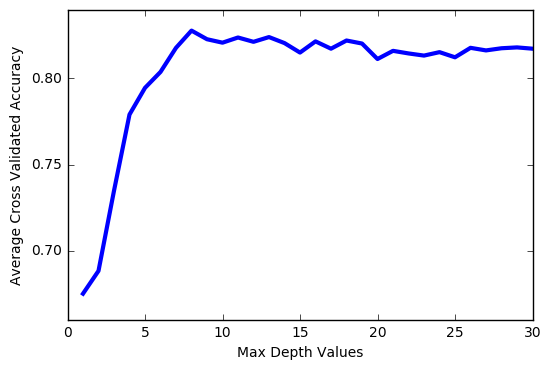

In [106]:
depths = range(1, 31)

cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth=i), d_X, d_y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");

In [ ]:
# or do the same with gridsearch

In [107]:
#Range of neighbors to test
depths_range = list(range(2, 31))

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [108]:
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(d_X, d_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [109]:
grid_dt.best_score_

0.82725000000000004

In [110]:
grid_dt.best_params_

{'max_depth': 9}

In [111]:
#Fit DT model on X and y with max_depth 9

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(d_X, d_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [113]:
#Call feature importanes and put that in a dataframe

df = pd.DataFrame(columns = ["score","feature"])
df["score"] = dt.feature_importances_
df["feature"] = d_X.columns
df


,score,feature
0,0.000000,haight
1,0.088673,mission
2,0.000000,soma
3,0.000000,sunset
4,0.174986,richmond
5,0.189501,glen_park
6,0.046893,castro
7,0.047113,potrero
8,0.135746,hayes_valley
9,0.000000,fillmore


In [ ]:
# 6 of the 14 features have no significance. remove these and run the model

In [115]:
columns = ["marina","bernal","fillmore","sunset","soma","haight"]

d_X2 = d_X.drop(columns, axis=1)

In [116]:
#Initialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(d_X2, d_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [117]:
grid_dt.best_score_

0.81925000000000003

In [118]:
grid_dt.best_params_

{'max_depth': 9}

In [ ]:
# Even though the score reduces by a small margin, we drop 6 features. Hence this is a good model

In [ ]:
#--------------------------------------- #2 Logistic Regression

In [132]:
#Step 1
dX_train, dX_test, dy_train, dy_test = train_test_split(d_X, d_y, 
                                                    test_size=0.4,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(dX_train, dy_train)

#Step 3
preds = lr.predict(dX_test)

#Step 4
testing_score = accuracy_score(dy_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 75.06 percent of the testing data


In [135]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), d_X,d_y, cv=5, scoring="accuracy").mean()

print (("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100))

The cross validated accuracy score is 76.65 percent


In [136]:
#Table of coefficients and their values
d_coef = pd.DataFrame(columns=["coef", "value"])
d_coef["coef"] = d_X.columns
d_coef["value"] = np.transpose(lr.coef_[0])

d_coef

,coef,value
0,haight,-0.231724
1,mission,0.165422
2,soma,0.014287
3,sunset,-0.036342
4,richmond,-0.397628
5,glen_park,0.185643
6,castro,0.275169
7,potrero,-0.388687
8,hayes_valley,0.011970
9,fillmore,0.011140


In [ ]:
#--------------------------------------- #3 Random Forest

In [138]:
#Import
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Compute the ideal number of estimator

In [142]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, d_X, d_y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

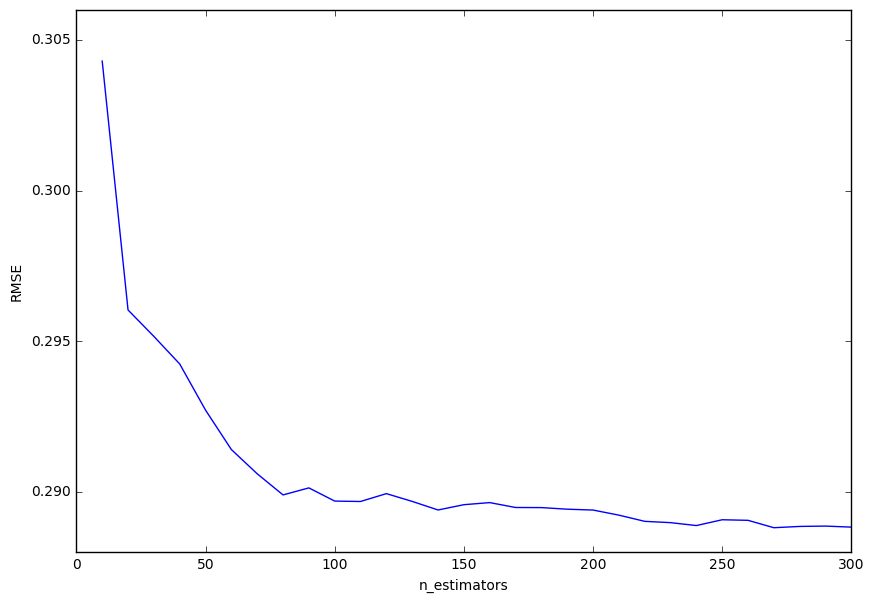

In [143]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [144]:
#Best estimator
sorted(zip(RMSE_scores, estimator_range))[0]

(0.2888175480832148, 270)

In [ ]:
# Tuning Max features

In [147]:
feature_cols = d_X.columns

In [154]:
# 240 is a big enough estimator

# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=240, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, d_X, d_y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

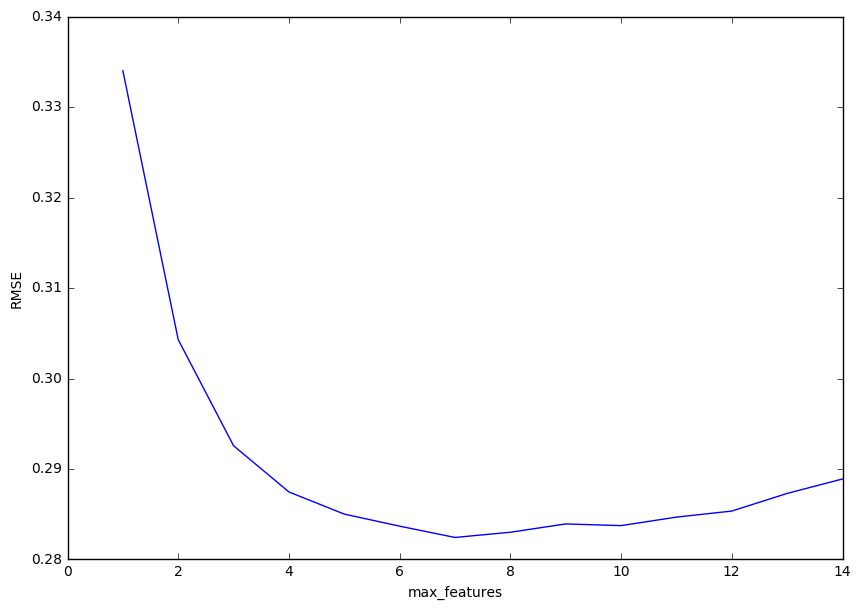

In [156]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [157]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(0.28242247725570552, 7)

In [ ]:
#Creating random forest with the best parameters

In [171]:
# max_features=7 is best and n_estimators=240 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=240, 
                              max_features=7,
                              oob_score=True,
                              random_state=1)
rfreg.fit(d_X, d_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=240, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [159]:
# compute feature importances
pd.DataFrame({'feature':feature_cols,
              'importance':rfreg.feature_importances_}).sort('importance', ascending = False)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,importance
12,north_beach,0.127486
5,glen_park,0.117523
4,richmond,0.116334
7,potrero,0.092659
13,excelsior,0.090818
6,castro,0.082547
10,bernal,0.073861
8,hayes_valley,0.073205
0,haight,0.068979
1,mission,0.067498


In [160]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.66075492355606413

In [162]:
d_X.shape

(4000, 14)

In [164]:
# set a threshold for which features to include
print (rfreg.transform(d_X, threshold='mean').shape)

rfreg.transform(d_X, threshold='mean')


(4000, 8)


C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 4.55767512,  1.11015572,  0.61729606, ..., -1.14497458,
         1.49838805,  2.15772961],
       [-1.26207178,  0.12098939,  3.97078726, ..., -3.38987933,
         0.51207915,  4.34069351],
       [ 0.90689348, -2.79948396,  0.58449822, ..., -1.38478126,
         1.50225475, -1.53935567],
       ..., 
       [ 1.99165404,  0.18856402, -3.62274408, ...,  3.28088655,
         2.80460309, -7.87025272],
       [-2.53465166, -0.91034214, -0.67499031, ...,  4.32700125,
         1.84599609, -7.37277265],
       [ 2.01231767,  3.02817255, -1.38875321, ...,  0.52950692,
        -1.58812129, -1.49132362]])

In [165]:
# create a new feature matrix that only includes important features
d_X_important = rfreg.transform(d_X, threshold='mean')

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [166]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=240, max_features=7, random_state=1)
scores = cross_val_score(rfreg, d_X_important, d_y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.28469076963123774

In [167]:
# check the RMSE for a Random Forest that includes ALL features ( for comparison )
rfreg = RandomForestRegressor(n_estimators=240, max_features=7, random_state=1)
scores = cross_val_score(rfreg, d_X, d_y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.28039343061579725

In [173]:
# max_features=7 is best and n_estimators=240 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=240, 
                              max_features=7,
                              oob_score=True,
                              random_state=1)
rfreg.fit(d_X, d_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=240, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [174]:
# create a new feature matrix that only includes important features
rfreg.transform(d_X, threshold=0.03)

d_X_important2 = rfreg.transform(d_X, threshold=0.03)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [175]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=240, max_features=7, random_state=1)
scores = cross_val_score(rfreg, d_X_important2, d_y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.27273203281733044

In [177]:
#Note: Removing the 4 features (marina, fillmore, soma, sunset) gives the lowest error

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [55]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [185]:
movies.shape

(5043, 28)

In [186]:
movies.describe()

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,NaN,NaN,NaN,NaN,5.800000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,166.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [56]:
movies.dropna(subset = ["gross"], inplace=True)

In [57]:
movies.shape

(4159, 28)

In [196]:
movies.describe()

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4156.000000,4157.000000,4156.00000,4146.000000,4155.000000,4.159000e+03,4.159000e+03,4159.000000,4152.000000,4158.000000,3.891000e+03,4156.000000,4153.000000,4159.000000,4054.000000,4159.000000
mean,159.333013,109.535242,747.16001,723.764834,7344.085921,4.846841e+07,9.748653e+04,10882.029574,1.373555,312.829004,4.521028e+07,2003.267565,1888.046472,6.469897,2.105740,8730.617697
std,122.574779,22.693707,2946.34955,1810.821487,15050.541525,6.845299e+07,1.472604e+05,18517.280893,2.040875,399.464221,2.223895e+08,9.945465,4370.489706,1.052182,0.349726,20788.260808
min,1.000000,34.000000,0.00000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,5.340988e+06,1.511700e+04,1736.500000,NaN,NaN,NaN,NaN,NaN,5.900000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2.551750e+07,4.639600e+04,3697.000000,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,182.000000
75%,NaN,NaN,NaN,NaN,NaN,6.230944e+07,1.145815e+05,15561.500000,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,10000.000000
max,813.000000,334.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [199]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [198]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 5042
Data columns (total 28 columns):
color                        4157 non-null object
director_name                4156 non-null object
num_critic_for_reviews       4156 non-null float64
duration                     4157 non-null float64
director_facebook_likes      4156 non-null float64
actor_3_facebook_likes       4146 non-null float64
actor_2_name                 4153 non-null object
actor_1_facebook_likes       4155 non-null float64
gross                        4159 non-null float64
genres                       4159 non-null object
actor_1_name                 4155 non-null object
movie_title                  4159 non-null object
num_voted_users              4159 non-null int64
cast_total_facebook_likes    4159 non-null int64
actor_3_name                 4146 non-null object
facenumber_in_poster         4152 non-null float64
plot_keywords                4119 non-null object
movie_imdb_link              4159 non-

In [227]:
movies.color.value_counts(normalize=True)

Color               0.966562
 Black and White    0.033438
Name: color, dtype: float64

In [ ]:
# Transform to dummy 

color # 96.6% color, rest B/W
content_rating


# Drop from the training dataset
director_name # TOO many distinct values
actor_2_name
genres
actor_1_name
movie_title 
actor_3_name
plot_keywords
movie_imdb_link
language # 94% is english. not distributed well
country # Can add it later


#Keep
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_1_facebook_likes
num_voted_users
cast_total_facebook_likes
facenumber_in_poster
num_user_for_reviews
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [58]:
color_dums = pd.get_dummies(movies.color, prefix = "col", drop_first= True)
content_rating_dums = pd.get_dummies(movies.content_rating, prefix = "cont_rtng", drop_first= True)

In [59]:
# Drop the columns not being used

m_cols = ["director_name","actor_2_name","genres","actor_1_name","movie_title","actor_3_name","plot_keywords","movie_imdb_link","language","country"]

movies.drop(m_cols,axis =1,inplace = True)

In [60]:
m2_cols = ["color","content_rating"]

movies.drop(m2_cols,axis =1,inplace = True)
mov_df = pd.concat([movies,color_dums,content_rating_dums],axis = 1)
mov_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,cont_rtng_M,cont_rtng_NC-17,cont_rtng_Not Rated,cont_rtng_PG,cont_rtng_PG-13,cont_rtng_Passed,cont_rtng_R,cont_rtng_TV-MA,cont_rtng_Unrated,cont_rtng_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [237]:
mov_df.shape

(4159, 29)

In [10]:
mov_df2 = mov_df.dropna()

In [239]:
mov_df2.shape

(3801, 29)

In [254]:
mov_df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,cont_rtng_M,cont_rtng_NC-17,cont_rtng_Not Rated,cont_rtng_PG,cont_rtng_PG-13,cont_rtng_Passed,cont_rtng_R,cont_rtng_TV-MA,cont_rtng_Unrated,cont_rtng_X
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03,3.801000e+03,3801.000000,3801.000000,3801.000000,...,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0,3801.000000,3801.000000
mean,165.848724,110.207840,798.599053,763.819521,7673.008419,5.200576e+07,1.046772e+05,11414.850303,1.379111,333.571692,...,0.000526,0.001579,0.008945,0.149171,0.345435,0.000789,0.449619,0.0,0.006051,0.002631
std,123.564807,22.688693,3051.030222,1884.372443,15448.143479,7.012065e+07,1.515070e+05,19045.793637,2.052899,410.048394,...,0.022936,0.039705,0.094167,0.356304,0.475573,0.028086,0.497521,0.0,0.077563,0.051231
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,75.000000,96.000000,11.000000,187.000000,736.000000,7.689458e+06,1.891500e+04,1865.000000,0.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,137.000000,106.000000,62.000000,433.000000,1000.000000,2.920000e+07,5.302800e+04,3969.000000,1.000000,208.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,223.000000,120.000000,234.000000,690.000000,13000.000000,6.646637e+07,1.269160e+05,16143.000000,2.000000,397.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [11]:
# Assign X and y
mov_X = mov_df2.drop("gross", axis = 1)
mov_y = mov_df2.gross

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

In [13]:
#----------------------------------- MODEL 1 (2 dummy variables) -- NOT FINAL MODEL


# Intialize an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(mov_X, mov_y)
# Print out the R^2 for the model against the full dataset
lr.score(mov_X,mov_y)

0.55097019057794361

In [246]:
#lr.rsquared
#lr.conf_int()
#lr.summary()

In [14]:
lr2 = lr.fit(mov_X, mov_y)

In [15]:
lr2.intercept_

882471221.70034754

In [16]:
lr2.coef_

array([  1.14415020e+05,   1.58382240e+05,  -1.24989707e+03,
        -1.10019953e+04,  -9.56645244e+03,   2.05517874e+02,
         9.52551361e+03,  -6.24239537e+05,   1.56104497e+04,
         9.01663318e-03,  -4.47817314e+05,  -8.93137604e+03,
        -3.86914239e+06,  -1.68909893e+06,  -1.57536115e+02,
         1.88101947e+07,   4.65613139e+07,  -6.43730894e+05,
         9.09940160e+06,  -2.11169789e+07,  -1.08178148e+07,
         4.01037875e+07,   1.65689322e+07,  -3.05897721e+07,
        -1.09062570e+07,   1.39698386e-09,  -4.73998224e+06,
        -1.58335674e+07])

In [ ]:
#----------------------------------- MODEL 2 - Final LR model

In [84]:
movies.shape

(4159, 16)

In [85]:
mov3 = movies.dropna()

In [86]:
mov3.shape

(3801, 16)

In [111]:
mov3.drop("title_year",axis=1,inplace=True)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [113]:
mov3.shape

(3801, 15)

In [114]:
# Assign X and y
mov3_X = mov3.drop("gross", axis = 1)
mov3_y = mov3.gross

In [115]:
linreg = LinearRegression()
mov_scores = cross_val_score(linreg, mov3_X, mov3_y, cv=5, scoring='mean_squared_error')
np.sqrt(abs(mov_scores)).mean()

55916185.611679241

In [116]:
linreg = LinearRegression()
mov_scores = cross_val_score(linreg, mov3_X, mov3_y, cv=5, scoring='r2')
np.sqrt(abs(mov_scores)).mean()

0.51405839277091125

In [ ]:
#---- splitting the data to fit and identify best coeficients

In [117]:
movX_train, movX_test, movy_train, movy_test = train_test_split(mov3_X, mov3_y, test_size=0.4, random_state=1)

In [136]:
linreg2 = LinearRegression()
linreg2.fit(movX_train,movy_train)
linreg2.score(movX_train,movy_train)

0.51348523934546053

In [137]:
linreg2.score(movX_test,movy_test)

0.37364631143362781

In [138]:
linreg2.intercept_

43595130.669217572

In [140]:
# compute feature importances
pd.DataFrame({'feature':mov3_X.columns,
              'importance':linreg2.coef_}).sort('importance', ascending = False)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,importance
1,duration,1.688638e+05
0,num_critic_for_reviews,5.127156e+04
8,num_user_for_reviews,1.306994e+04
6,cast_total_facebook_likes,1.124022e+04
5,num_voted_users,2.748166e+02
9,budget,4.249077e-02
13,movie_facebook_likes,-1.761181e+02
2,director_facebook_likes,-1.553876e+03
10,actor_2_facebook_likes,-1.094259e+04
4,actor_1_facebook_likes,-1.130845e+04


In [142]:
mov3_X.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.227705,0.176916,0.255086,0.170198,0.594990,0.241005,-0.034009,0.566795,0.105681,0.255837,0.343881,0.180641,0.703969
duration,0.227705,1.000000,0.179734,0.125771,0.084720,0.338038,0.121171,0.029100,0.350391,0.068161,0.129452,0.366124,0.153114,0.214936
director_facebook_likes,0.176916,0.179734,1.000000,0.118240,0.090733,0.300619,0.119741,-0.047619,0.218311,0.018559,0.116900,0.190838,0.037871,0.162737
actor_3_facebook_likes,0.255086,0.125771,0.118240,1.000000,0.253720,0.269455,0.490686,0.105018,0.207321,0.040478,0.554182,0.064974,0.047123,0.272513
actor_1_facebook_likes,0.170198,0.084720,0.090733,0.253720,1.000000,0.182265,0.944925,0.057580,0.125221,0.017086,0.392676,0.093131,0.057604,0.131778
num_voted_users,0.594990,0.338038,0.300619,0.269455,0.182265,1.000000,0.251940,-0.032026,0.779925,0.066824,0.246660,0.477917,0.085485,0.518691
cast_total_facebook_likes,0.241005,0.121171,0.119741,0.490686,0.944925,0.251940,1.000000,0.080985,0.182288,0.029423,0.644016,0.106259,0.069675,0.207061
facenumber_in_poster,-0.034009,0.029100,-0.047619,0.105018,0.057580,-0.032026,0.080985,1.000000,-0.079404,-0.021757,0.074138,-0.064292,0.016620,0.014332
num_user_for_reviews,0.566795,0.350391,0.218311,0.207321,0.125221,0.779925,0.182288,-0.079404,1.000000,0.071254,0.189582,0.322522,0.098557,0.371970
budget,0.105681,0.068161,0.018559,0.040478,0.017086,0.066824,0.029423,-0.021757,0.071254,1.000000,0.036211,0.029041,0.025796,0.053035


In [174]:
rem_cols =[]

mov4_X = mov3_X.drop(rem_cols, axis=1)

In [175]:
mov4X_train, mov4X_test, mov4y_train, mov4y_test = train_test_split(mov4_X, mov3_y, test_size=0.4, random_state=1)

In [176]:
linreg4 = LinearRegression()
linreg4.fit(mov4X_train,mov4y_train)
linreg4.score(mov4X_train,mov4y_train)

0.51348523934546053

In [177]:
linreg4.score(mov4X_test,mov4y_test)

0.37364631143362781

In [178]:
# compute feature importances
pd.DataFrame({'feature':mov4_X.columns,
              'importance':linreg4.coef_}).sort('importance', ascending = False)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,importance
1,duration,1.688638e+05
0,num_critic_for_reviews,5.127156e+04
8,num_user_for_reviews,1.306994e+04
6,cast_total_facebook_likes,1.124022e+04
5,num_voted_users,2.748166e+02
9,budget,4.249077e-02
13,movie_facebook_likes,-1.761181e+02
2,director_facebook_likes,-1.553876e+03
10,actor_2_facebook_likes,-1.094259e+04
4,actor_1_facebook_likes,-1.130845e+04


In [170]:
mov4_X.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.227705,0.176916,0.255086,0.170198,0.594990,0.241005,-0.034009,0.566795,0.105681,0.255837,0.343881,0.180641,0.703969
duration,0.227705,1.000000,0.179734,0.125771,0.084720,0.338038,0.121171,0.029100,0.350391,0.068161,0.129452,0.366124,0.153114,0.214936
director_facebook_likes,0.176916,0.179734,1.000000,0.118240,0.090733,0.300619,0.119741,-0.047619,0.218311,0.018559,0.116900,0.190838,0.037871,0.162737
actor_3_facebook_likes,0.255086,0.125771,0.118240,1.000000,0.253720,0.269455,0.490686,0.105018,0.207321,0.040478,0.554182,0.064974,0.047123,0.272513
actor_1_facebook_likes,0.170198,0.084720,0.090733,0.253720,1.000000,0.182265,0.944925,0.057580,0.125221,0.017086,0.392676,0.093131,0.057604,0.131778
num_voted_users,0.594990,0.338038,0.300619,0.269455,0.182265,1.000000,0.251940,-0.032026,0.779925,0.066824,0.246660,0.477917,0.085485,0.518691
cast_total_facebook_likes,0.241005,0.121171,0.119741,0.490686,0.944925,0.251940,1.000000,0.080985,0.182288,0.029423,0.644016,0.106259,0.069675,0.207061
facenumber_in_poster,-0.034009,0.029100,-0.047619,0.105018,0.057580,-0.032026,0.080985,1.000000,-0.079404,-0.021757,0.074138,-0.064292,0.016620,0.014332
num_user_for_reviews,0.566795,0.350391,0.218311,0.207321,0.125221,0.779925,0.182288,-0.079404,1.000000,0.071254,0.189582,0.322522,0.098557,0.371970
budget,0.105681,0.068161,0.018559,0.040478,0.017086,0.066824,0.029423,-0.021757,0.071254,1.000000,0.036211,0.029041,0.025796,0.053035


In [ ]:
#------------------------ scaling (DOES NOT HELP)

In [100]:
from sklearn.preprocessing import StandardScaler

In [121]:
#Scale data and fit it a Grid search function it.

#Intialize scalar
scale = StandardScaler()

#Fit and transform scaler on the data
mov3_Xs = scale.fit_transform(mov3_X)

In [122]:
movXs_train, movXs_test, movys_train, movys_test = train_test_split(mov3_Xs, mov3_y, test_size=0.4, random_state=1)

In [134]:
linreg = LinearRegression()
lr = linreg.fit(movXs_train,movys_train)
lr.score(movXs_train,movys_train)

0.51348523934546053

In [135]:
lr.score(movXs_test,movys_test)

0.37364631136251081

In [132]:
# compute feature importances
pd.DataFrame({'feature':mov3_X.columns,
              'importance':lr.coef_}).sort('importance', ascending = False)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,importance
6,cast_total_facebook_likes,2.140507e+08
5,num_voted_users,4.163117e+07
9,budget,9.547255e+06
0,num_critic_for_reviews,6.334527e+06
8,num_user_for_reviews,5.358603e+06
1,duration,3.830796e+06
7,facenumber_in_poster,-2.453774e+06
12,aspect_ratio,-2.641088e+06
13,movie_facebook_likes,-3.761290e+06
2,director_facebook_likes,-4.740298e+06


In [68]:
#Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [38]:
# --------------------------------------- RIDGE MODEL

In [182]:
#Ridge

ridge = Ridge(alpha=0.4)
ridge.fit(mov4X_train, mov4y_train)
ridge.score(mov4X_test, mov4y_test)

0.37365814901963018

In [188]:
#Lasso

ridge = Ridge(alpha=0.4)
ridge.fit(mov4X_train, mov4y_train)
ridge.score(mov4X_test, mov4y_test)

C:\Users\shoprabhakar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.37398971568828832

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.

In [473]:
# load the data and create the training and test sets
# random_state = 1 is just a seed to permit reproducibility of the train/test split

from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1)
 
# reformat train/test datasets for convenience
train = np.array(list(zip(X_train,y_train)))
test = np.array(list(zip(X_test, y_test)))

In [439]:
y_train

array([0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [440]:
import math
 
# 1) given two data points, calculate the euclidean distance between them
def get_distance(data1, data2):
    points = zip(data1, data2)
    diffs_squared_distance = [pow(a - b, 2) for (a, b) in points]
    return math.sqrt(sum(diffs_squared_distance))

In [461]:
get_distance(X_train[0], X_train[1])

4.052159917870962

In [472]:
train[0][0]

array([ 4.8,  3.4,  1.6,  0.2])

In [474]:
from operator import itemgetter
 
def get_neighbours(training_set, test_instance, k):
    distances = [_get_tuple_distance(training_instance, test_instance) for training_instance in training_set]
 
    # index 1 is the calculated distance between training_instance and test_instance
    sorted_distances = sorted(distances, key=itemgetter(1))
 
    # extract only training instances
    sorted_training_instances = [tuple[0] for tuple in sorted_distances]
 
    # select first k elements
    return sorted_training_instances[:k]
 
def _get_tuple_distance(training_instance, test_instance):
    return (training_instance, get_distance(test_instance, training_instance[0]))

In [475]:
_get_tuple_distance(train[0], test[0][0])

(array([array([ 4.8,  3.4,  1.6,  0.2]), 0], dtype=object), 1.2328828005937953)

In [476]:
from collections import Counter
 
# 3) given an array of nearest neighbours for a test case, tally up their classes to vote on test case class
 
def get_majority_vote(neighbours):
    # index 1 is the class
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter(classes)
    return count.most_common()[0][0]

In [479]:
from sklearn.metrics import classification_report, accuracy_score
 
# setting up main executable method
def main():

    # generate predictions
    predictions = []
 
    # let's arbitrarily set k equal to 5, meaning that to predict the class of new instances,
    k = 5
 
    # for each instance in the test set, get nearest neighbours and majority vote on predicted class
    for x in range(len(X_test)):
 
            neighbours = get_neighbours(training_set=train, test_instance=test[x][0], k=5)
            majority_vote = get_majority_vote(neighbours)
            predictions.append(majority_vote)
             
    # summarize performance of the classification
    print ('\nThe overall accuracy of the model is: ' + str(accuracy_score(y_test, predictions)) + "\n")
    report = classification_report(y_test, predictions, target_names = iris.target_names)

main()


The overall accuracy of the model is: 0.983333333333

